## Project 2 - Ruggiero Julian

### Part 1: Introduction

I will work with a dataset containing information regarding pacients with some of them facing a heart desease while others don't.
According to the World Health Organization, of the 56.9 million deaths worldwide in 2016 ischaemic heart disease and stroke are the world’s biggest killers, accounting for a combined 15.2 million deaths in 2016. These diseases have remained the leading causes of death globally in the last 15 years. 

Source: https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death

<img src="Data/Images/Top 10 global death causes.png"
/>



To learn how to prevent heart disease we must first learn to reliably detect it and this project is focused on finding some relationships in the pacients that faced with this patology and understand better some relationships between its attributes.

### Part 2: Data Summary

I aquire a dataset that is used in a machine learning competition where the purpose is to predict if a pacient will face or not a heart desease based on existing data. The link of the competition is below

https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/

And the dataset information and data folder is in the following link:

http://archive.ics.uci.edu/ml/datasets/statlog+(heart)


The dataset contains 14 attributes, including the last field with a value related to the Absence (1) or presence (2) of heart disease. It contains 270 records or instances.

#### Attribute Information:
-----------------------------
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest (https://en.wikipedia.org/wiki/ST_depression). Refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline. It is often a sign of myocardial ischemia, of which coronary insufficiency is a major cause. Example in image below.
![image.png](attachment:image.png)
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. Absence (1) or presence (2) of heart disease

For the purpose of this project I will provide an EDA and answer the following question based on the data provided

### ¿What are the main reasons that impact a heart decease and do the reasons affect the same on man and women?

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [75]:
#delimeter =' ' is necessary because the file is delimited by spaces instead of colon
#header=None to avoid losing the first row when assigning columns

df=pd.read_csv('https://raw.githubusercontent.com/gitjuli/DAV-5400/master/Data/heart.dat', delimiter=' ',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [140]:
#creating columns based on data dictionary
df.columns=['age','sex','chest pain type', 'rest blood press','serum cholesterol',
           'fasting blood sugar > 120','rest electrocard result', 'max heart rate', 
            'excercise ind chest pain','oldpeak','slope of peak', 'number vessels',
           'thal','desease']
df.head()

,age,sex,chest pain type,rest blood press,serum cholesterol,fasting blood sugar > 120,rest electrocard result,max heart rate,excercise ind chest pain,oldpeak,slope of peak,number vessels,thal,desease
0,70.0,Male,4.0,130.0,322.0,No,2.0,109.0,0.0,2.4,2.0,3.0,3.0,Yes
1,67.0,Female,3.0,115.0,564.0,No,2.0,160.0,0.0,1.6,2.0,0.0,7.0,No
2,57.0,Male,2.0,124.0,261.0,No,0.0,141.0,0.0,0.3,1.0,0.0,7.0,Yes
3,64.0,Male,4.0,128.0,263.0,No,0.0,105.0,1.0,0.2,2.0,1.0,7.0,No
4,74.0,Female,2.0,120.0,269.0,No,2.0,121.0,1.0,0.2,1.0,1.0,3.0,No


In [141]:
df.sex.replace({0.0: 'Female', 1.0: 'Male'}, inplace = True)
df.desease.replace({1: 'No', 2: 'Yes'}, inplace = True)
df['fasting blood sugar > 120'].replace({0: 'No', 1: 'Yes'}, inplace = True)
df['excercise ind chest pain'].replace({0: 'No', 1: 'Yes'}, inplace = True)
df.head()

,age,sex,chest pain type,rest blood press,serum cholesterol,fasting blood sugar > 120,rest electrocard result,max heart rate,excercise ind chest pain,oldpeak,slope of peak,number vessels,thal,desease
0,70.0,Male,4.0,130.0,322.0,No,2.0,109.0,No,2.4,2.0,3.0,3.0,Yes
1,67.0,Female,3.0,115.0,564.0,No,2.0,160.0,No,1.6,2.0,0.0,7.0,No
2,57.0,Male,2.0,124.0,261.0,No,0.0,141.0,No,0.3,1.0,0.0,7.0,Yes
3,64.0,Male,4.0,128.0,263.0,No,0.0,105.0,Yes,0.2,2.0,1.0,7.0,No
4,74.0,Female,2.0,120.0,269.0,No,2.0,121.0,Yes,0.2,1.0,1.0,3.0,No


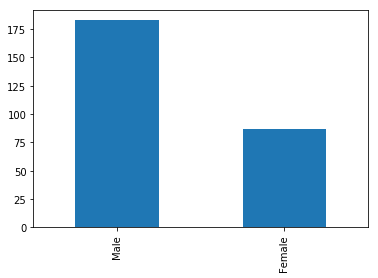

In [128]:
df['sex'].value_counts().plot(kind='bar')
plt.show()

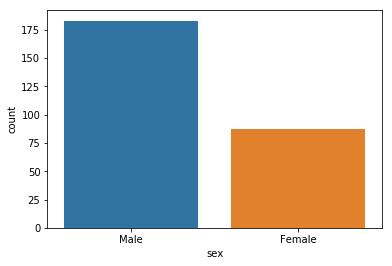

In [129]:
sns.countplot(x='sex', data=df);

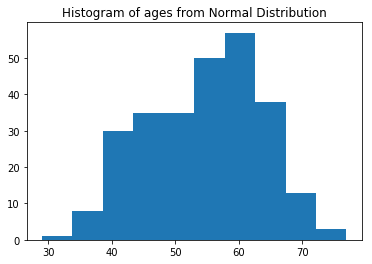

In [130]:
# define a Matplotlib figure
plt.figure(1)
plt.subplot(111)
# define the plot you want to generate
plt.hist(df['age'])
#plt.subplot(111)
# define a title for the plot
plt.title('Histogram of ages from Normal Distribution')
# define the number of bins for the histogram + which plot axis they will
# be applied to
plt.locator_params(nbins=10, axis = 'x')
plt.show()

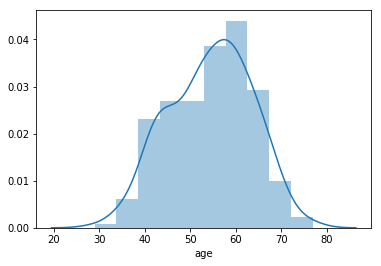

In [131]:
# age
sns.distplot(df['age'], bins = 10)

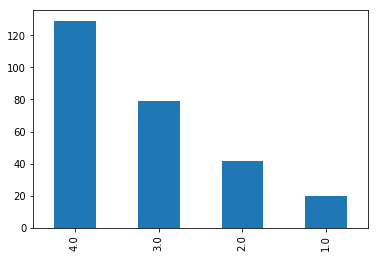

In [132]:
df['chest pain type'].value_counts().plot(kind='bar')
plt.show()

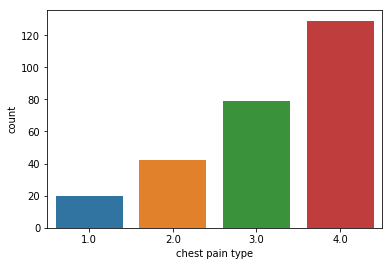

In [133]:
sns.countplot(x='chest pain type', data=df);

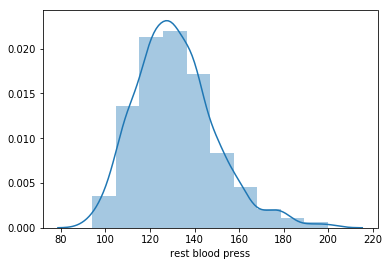

In [134]:
# resting blood pressure
sns.distplot(df['rest blood press'], bins = 10)

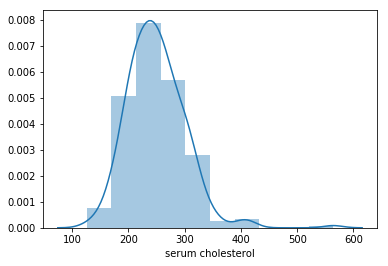

In [135]:
#serum cholesterol
sns.distplot(df['serum cholesterol'], bins = 10)

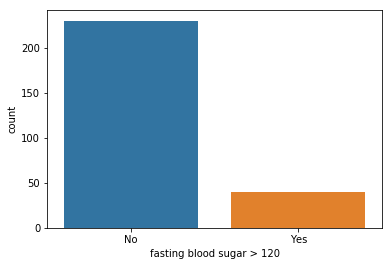

In [137]:
sns.countplot(x='fasting blood sugar > 120', data=df);

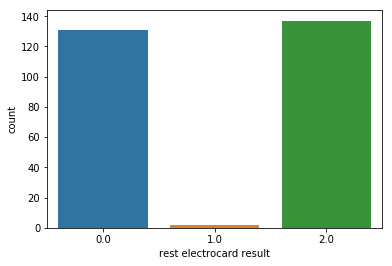

In [138]:
sns.countplot(x='rest electrocard result', data=df);

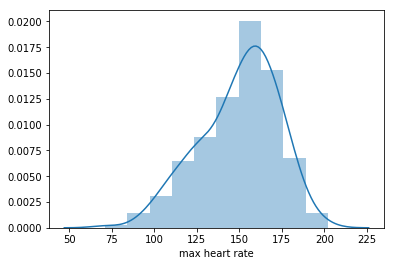

In [139]:
# max heart rate
sns.distplot(df['max heart rate'], bins = 10)

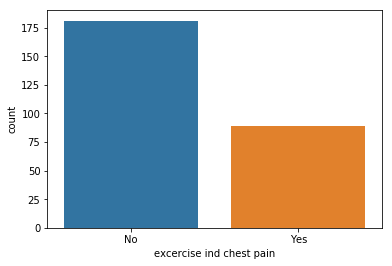

In [142]:
#excercise ind chest pain
sns.countplot(x='excercise ind chest pain', data=df);

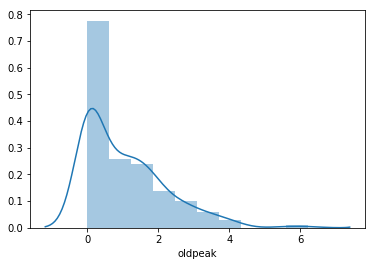

In [145]:
# oldpeak
sns.distplot(df['oldpeak'], bins = 10)

In [146]:
df['oldpeak'].describe()

count    270.00000
mean       1.05000
std        1.14521
min        0.00000
25%        0.00000
50%        0.80000
75%        1.60000
max        6.20000
Name: oldpeak, dtype: float64

In [150]:
df[df['oldpeak']>1]['desease'].value_counts()

Yes    73
No     40
Name: desease, dtype: int64

In [151]:
df[df['oldpeak']<=1]['desease'].value_counts()

No     110
Yes     47
Name: desease, dtype: int64

In [27]:
deseaseYes.describe()

,age,sex,chest pain type,rest blood press,serum cholesterol,fasting blood sugar,rest electrocard result,max heart rate,excercise ind angina,oldpeak,slope of peak,number vessels,thal,abs or prese
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.0
mean,56.591667,0.833333,3.616667,134.441667,256.466667,0.141667,1.22500,138.858333,0.55000,1.584167,1.816667,1.150000,5.833333,2.0
std,8.116273,0.374241,0.779823,19.095424,47.969166,0.350170,0.97414,23.130719,0.49958,1.282067,0.564843,1.034286,1.769648,0.0
min,35.000000,0.000000,1.000000,100.000000,149.000000,0.000000,0.00000,71.000000,0.00000,0.000000,1.000000,0.000000,3.000000,2.0
25%,52.000000,1.000000,4.000000,120.000000,227.250000,0.000000,0.00000,124.750000,0.00000,0.600000,1.000000,0.000000,3.000000,2.0
50%,58.000000,1.000000,4.000000,130.000000,255.500000,0.000000,2.00000,141.500000,1.00000,1.400000,2.000000,1.000000,7.000000,2.0
75%,62.000000,1.000000,4.000000,145.000000,286.500000,0.000000,2.00000,157.250000,1.00000,2.425000,2.000000,2.000000,7.000000,2.0
max,77.000000,1.000000,4.000000,200.000000,409.000000,1.000000,2.00000,195.000000,1.00000,6.200000,3.000000,3.000000,7.000000,2.0


In [28]:
deseaseYes.corr()

,age,sex,chest pain type,rest blood press,serum cholesterol,fasting blood sugar,rest electrocard result,max heart rate,excercise ind angina,oldpeak,slope of peak,number vessels,thal,abs or prese
age,1.000000,-0.152624,-0.046182,0.219196,0.158381,0.091487,0.106312,-0.147846,-0.020828,0.094910,0.133841,0.370739,-0.179130,NaN
sex,-0.152624,1.000000,-0.134373,-0.334153,-0.313940,-0.138936,-0.011525,-0.090119,0.044947,-0.131649,-0.145763,-0.086840,0.160723,NaN
chest pain type,-0.046182,-0.134373,1.000000,-0.104221,-0.005062,-0.045648,0.070244,-0.226189,0.351593,0.096421,0.048966,0.123983,0.135995,NaN
rest blood press,0.219196,-0.334153,-0.104221,1.000000,0.229565,0.169021,0.077284,0.023049,0.063292,0.164225,0.210917,0.016190,0.104652,NaN
serum cholesterol,0.158381,-0.313940,-0.005062,0.229565,1.000000,0.117099,0.095743,0.045282,0.094748,-0.065617,-0.034653,0.099864,-0.054809,NaN
fasting blood sugar,0.091487,-0.138936,-0.045648,0.169021,0.117099,1.000000,0.078216,0.064748,0.079260,-0.017423,0.089929,0.126453,0.024862,NaN
rest electrocard result,0.106312,-0.011525,0.070244,0.077284,0.095743,0.078216,1.000000,0.045061,-0.031945,0.015661,0.014509,0.141371,-0.090181,NaN
max heart rate,-0.147846,-0.090119,-0.226189,0.023049,0.045282,0.064748,0.045061,1.000000,-0.302264,-0.233346,-0.365404,-0.083757,0.021385,NaN
excercise ind angina,-0.020828,0.044947,0.351593,0.063292,0.094748,0.079260,-0.031945,-0.302264,1.000000,0.181648,0.211436,-0.047163,0.152083,NaN
oldpeak,0.094910,-0.131649,0.096421,0.164225,-0.065617,-0.017423,0.015661,-0.233346,0.181648,1.000000,0.607498,0.129185,0.156612,NaN
